# WEB SCRAPING


## INTRODUCTION:
With web scraping, we're often accessing data that's sitting on the web locked in a table written in Hypertext Markup Language, or HTML. 

Useful Link: https://thomaslevine.com/!/web-sites-to-data-tables/#what-i-mean-by-%22making-websites-into-data-tables%22

In order to access the data we want, we have to know something about the target. In the case of downloading data from a website, it's simply knowing the URL string that takes us to the file location online. In the case of an API, it's knowing not only the service endpoint, but also the available query parameters and setting up the authentication tokens.

Often the data we wanted is locked away in tables on a webpage. To extract the data, we need to download the page and remove only those elements we want.

Fundamentally, HTML is just as it sounds: a markup language for text that tells a browser how to display (or render) the text. The markup is done with tags that are added to the text to indicate simple things like the font to use or the size of the text. They can also specify the location on the page where the text should appear. These are usually the type of tags we're interested in. In most cases, the data we want is embedded in a tag. An HTML table tag has a very simple structure:

## SCRAPING DATA FROM THE UN:

We're going to scrape school life expenctancy data for countries around the world. This is a measure of how long someone is likely to stay in school. The page we're querying comes from the Internet Archive. 

The first step is to inspect the page. Go to http://web.archive.org/web/20110514112442/http://unstats.un.org/unsd/demographic/products/socind/education.htm and check out the page with a web developer tool (in Chrome and Firefox, right click on the page and select "Inspect Element" near/on table).

If you click through the tags, you'll notice a number of tables on the page. In the beginning of the web, tables were used to arrange elements on a page. More recently, webpage designers use other methods to arrange content, but some pages (like this one) still use tables to keep the content properly arranged.

To get the data we want, we need to extract the right table and get just the data in between the tags. In this case, we're going to use a package called BeautifulSoup and our old friend, Requests:

In [1]:
from bs4 import BeautifulSoup
import requests

We import the page as we've been doing previously:

In [2]:
url = "http://web.archive.org/web/20110514112442/http://unstats.un.org/unsd/demographic/products/socind/education.htm"

r = requests.get(url)

Then we pass the result to BeautifulSoup to do its thing:

In [3]:
soup = BeautifulSoup(r.content)

As the name implies, the webpage content exists as a mess of text in the soup object. We need to extract the table we want, so we start trying to filter through, checking each table for the content we want:

In [4]:
for row in soup('table'):
    print(row)

<table style="width:100%;"><tbody><tr>
<td id="wm-logo">
<a href="/web/" title="Wayback Machine home page"><img alt="Wayback Machine" border="0" height="39" src="/static/images/toolbar/wayback-toolbar-logo.png" width="110"/></a>
</td>
<td class="c">
<table style="margin:0 auto;"><tbody><tr>
<td class="u" colspan="2">
<form action="/web/form-submit.jsp" id="wmtb" method="get" name="wmtb" target="_top"><input id="wmtbURL" name="url" onfocus="this.focus();this.select();" style="width:400px;" type="text" value="http://unstats.un.org/unsd/demographic/products/socind/education.htm"/><input name="type" type="hidden" value="replay"/><input name="date" type="hidden" value="20110514112442"/><input type="submit" value="Go"/><span id="wm_tb_options" style="display:block;"></span></form>
</td>
<td class="n" rowspan="2">
<table><tbody>
<!-- NEXT/PREV MONTH NAV AND MONTH INDICATOR -->
<tr class="m">
<td class="b" nowrap="nowrap">
<a href="/web/20100819143645/http://unstats.un.org/unsd/demographic/pro

We see that the 7th table (at index 6) has the data we want:

In [5]:
soup('table')[9]

<table align="left" cellpadding="0" cellspacing="0">
<tr class="bar1">
<td colspan="12" height="30"><span style="font-weight: bold; color: #ffffff">Indicators on education</span></td>
</tr>
<tr>
<td class="csubhd" colspan="12" height="16"><div align="right">Last update: December 2010</div></td>
</tr>
<tr bgcolor="#bce6f8">
<td height="30"><div align="center"><a href="#tech"></a></div></td>
<td colspan="11" height="30"><div align="center"><a href="#tech">School life expectancy (in years). Primary to tertiary education</a></div></td>
</tr>
<tr class="lheader">
<td height="19" width="281"><span style="color: #336699">Country or area</span></td>
<td height="19" width="87"><div align="right" style="color: #336699">Year</div></td>
<td height="19" width="6"><span style="color: #336699"></span></td>
<td height="19" width="39"><span style="color: #336699"></span></td>
<td colspan="3" height="19"><div align="center" style="color: #336699">Total</div></td>
<td colspan="3" height="19"><div align="

The following lines of code worked, but was messy. Hence it is shown as commented.

In [6]:
# %load_ext sql
# %sql sqlite:///webscrap.db
# %sql DROP TABLE webscrapUN_refcopy
# %%sql
# CREATE TABLE webscrapUN_refcopy (
#     COUNTRY TEXT PRIMARY KEY,
#     YEAR INT,
#     AB TEXT,
#     TOTAL INT, 
#     MEN INT,
#     WOMEN INT
# )
# sql = "INSERT INTO webscrapUN_refcopy (COUNTRY, YEAR, AB, TOTAL, MEN, WOMEN) VALUES (?,?,?,?,?,?)"

# my_table=soup('table')[9]
# rows = my_table.findChildren(['tr'])

# import sqlite3 as lite
# con= lite.connect('webscrap.db')

# Reference for following lines of code:
# http://stackoverflow.com/questions/2010481/how-do-you-get-all-the-rows-from-a-particular-table-using-beautifulsoup
# http://stackoverflow.com/questions/9088203/beautifulsoup-how-to-remove-empty-tables-while-preserving-tables-that-are-part

# for row in rows:
#     count = 0     
#     cells = row.findChildren(['td'])
#     for cell in cells:
#         value = cell.string
#         if value not in [None, '\xa0']: 
#             value=value.split()
#             if value[0] not in ['Indicators', 'Last', 'School', 'Country', 'Year', 'Total', 'Men', 'Women']:   
#                 count=count+1
#                 copyvalue=str(value).strip('[]')
#                 if count==1:
#                     copyvalue1=copyvalue
#                 if count==2:
#                     copyvalue2=copyvalue
#                 if count==3:
#                     copyvalue3=copyvalue
#                 if count==4:
#                     copyvalue4=copyvalue
#                 if count==5:
#                     copyvalue5=copyvalue
#                 if count==6:
#                     copyvalue6=copyvalue
#                     newcopyvalue=[copyvalue1,copyvalue2,copyvalue3,copyvalue4,copyvalue5,copyvalue6]
#                     with con:
#                          cur=con.cursor()
#                          cur.execute("INSERT INTO webscrapUN_refcopy VALUES(?,?,?,?,?,?)",newcopyvalue)

In [7]:
my_table=soup('table')[9]
rows = my_table.findChildren(['tr'])[4:]

import sqlite3 as lite
con= lite.connect('webscrap.db')
cur=con.cursor()


%load_ext sql
%sql sqlite:///webscrap.db
%sql DROP TABLE IF EXISTS webscrapUN_refcopy
%sql CREATE TABLE IF NOT EXISTS webscrapUN_refcopy(COUNTRY TEXT PRIMARY KEY,YEAR INT,TOTAL INT, MEN INT,WOMEN INT)
sql = "INSERT INTO webscrapUN_refcopy (COUNTRY, YEAR, TOTAL, MEN, WOMEN) VALUES (?,?,?,?,?)"


for row in rows:
    count = 0     
    cells = row.findChildren(['td'])
    entry = []
    for i in [0, 1, 4, 7, 10]:
        try:
            entry.append(int(cells[i].string))
        except ValueError:
            entry.append(cells[i].string)
    with con:
        cur.execute(sql, entry)

//anaconda/lib/python3.4/site-packages/IPython/config.py:13: ShimWarning: The `IPython.config` package has been deprecated. You should import from traitlets.config instead.
  "You should import from traitlets.config instead.", ShimWarning)
//anaconda/lib/python3.4/site-packages/IPython/utils/traitlets.py:5: UserWarning: IPython.utils.traitlets has moved to a top-level traitlets package.
  warn("IPython.utils.traitlets has moved to a top-level traitlets package.")


Done.
Done.


In [8]:
import pandas as pd

with con:
    cur.execute("SELECT * FROM webscrapUN_refcopy")
    rows=cur.fetchall()
    cols = [desc[0] for desc in cur.description]
    df_edu = pd.DataFrame(rows, columns=cols)

In [9]:
df_edu

,COUNTRY,YEAR,TOTAL,MEN,WOMEN
0,Afghanistan,2004,8,11,5
1,Albania,2004,11,11,11
2,Algeria,2005,13,13,13
3,Andorra,2008,11,11,12
4,Anguilla,2008,11,11,11
5,Antigua and Barbuda,2000,14,12,16
6,Argentina,2007,16,15,17
7,Armenia,2009,12,12,13
8,Aruba,2009,13,13,13
9,Australia,2008,21,20,21


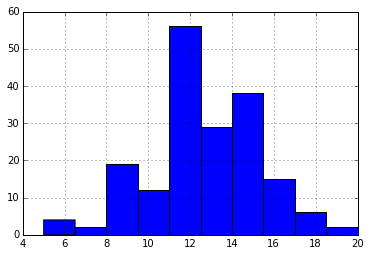

In [10]:
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

df_edu['MEN'].hist()

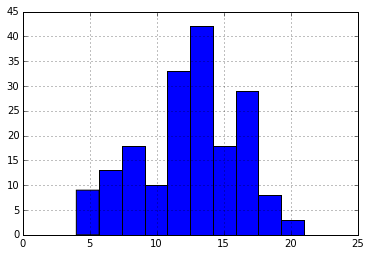

In [11]:
df_edu['WOMEN'].hist()

### STATS FOR MEN:

In [12]:
df_edu['MEN'].mean()

12.39344262295082

In [13]:
df_edu['MEN'].median()

12.0

### STATS FOR WOMEN:

In [14]:
df_edu['WOMEN'].mean()

12.513661202185792

In [15]:
df_edu['WOMEN'].median()

13.0

In [16]:
import csv

# select columns for use in pandas DataFrame
# school life expectancy data only has data for years 1999 to 2010
# only select data for the appropriate period, 1999 to 2010

columns = ['Country Name','1999','2000','2001','2002','2003','2004','2005','2006','2007','2008','2009','2010']


# create a new DataFrame that only displays data for the reduced period
df_gdp = pd.read_csv('/Users/AshRajBala/Repositories/ThinkfulProjects/ny.gdp.mktp.cd_Indicator_en_csv_v2.csv', skiprows=4, usecols=columns)

In [17]:
# PREVIOUS ATTEMPT: Left columns names with underscore before year name.

# %sql DROP TABLE IF EXISTS gdp
# %sql CREATE TABLE IF NOT EXISTS gdp(country_name TEXT PRIMARY KEY, _1999 NUMERIC, _2000 NUMERIC, _2001 NUMERIC, _2002 NUMERIC, _2003 NUMERIC, _2004 NUMERIC, _2005 NUMERIC, _2006 NUMERIC, _2007 NUMERIC, _2008 NUMERIC, _2009 NUMERIC, _2010 NUMERIC)

# with open('/Users/AshRajBala/Repositories/ThinkfulProjects/ny.gdp.mktp.cd_Indicator_en_csv_v2.csv','rU') as inputFile:
#     next(inputFile) # skip the first two lines
#     next(inputFile)
#     next(inputFile) 
#     next(inputFile)         
#     header = next(inputFile)
#     inputReader = csv.reader(inputFile)
#     for line in inputReader:
#         with con:
#            cu.execute('INSERT INTO gdp (country_name, _1999, _2000, _2001, _2002, _2003, _2004, _2005, _2006, _2007, _2008, _2009, _2010) VALUES ("' + line[0] + '","' + '","'.join(line[42:-6]) + '");')
# %sql SELECT * FROM gdp
# with con:
#    cur.execute("SELECT * FROM gdp")
#    rows=cur.fetchall()
#    cols = [desc[0] for desc in cur.description]
#    df_gdp = pd.DataFrame(rows, columns=cols)

In [18]:
type(df_edu['YEAR'])

pandas.core.series.Series

In [19]:
df_edu.set_index('COUNTRY', inplace=True)

In [20]:
df_gdp.set_index('Country Name', inplace=True)

In [21]:
#merge the two dataframes:
combined_dfs = pd.merge(df_edu,df_gdp, how='inner', left_index=True, right_index=True)

In [49]:
#Newdfs=combined_dfs[['YEAR', '1999','2000','2001','2002','2003','2004','2005','2006','2007','2008','2009','2010']]

In [50]:
# create new columns to match the year of the school life expectancy and GDP for that year
combined_dfs['DataYear'] = combined_sets.apply(lambda x: x['Year'], axis=1)
combined_dfs['GDP'] = combined_sets.apply(lambda x: x[x['Year']], axis=1)

NameError: name 'combined_sets' is not defined